<a href="https://colab.research.google.com/github/alwinbahari/kuliah/blob/main/Lab_Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab Pertemuan 14 (ENSEMBLE METHOD) : Random_Forest_Regression

**Identitas:**
- Nama 	: ALWIN BAHARI
- NIM	: 2111600512

# <center>Random Forest Regression (RFR)</center>

Pohon Keputusan (Decision Tree) adalah algoritma yang mudah dipahami dan diinterpretasikan dan karenanya satu pohon mungkin tidak cukup bagi model untuk mempelajari fitur-fiturnya. Di sisi lain, Random Forest juga merupakan algoritma berbasis “Pohon” yang menggunakan fitur kualitas dari beberapa Pohon Keputusan untuk membuat keputusan.
Oleh karena itu, dapat disebut sebagai ‘Forest’ atau ‘Hutan’ dari pohon-pohon dan karenanya disebut “Random Forest". Istilah ‘Random’ atau ‘Acak' disebabkan oleh fakta bahwa algoritma ini adalah hutan dari 'Pohon Keputusan atau Decision Tree yang dibuat secara acak atatu random'.
Algoritma Decision Tree memiliki kelemahan utama yaitu menyebabkan over-fitting. Masalah ini dapat diatasi dengan menerapkan Regresi Random Forest (Random Forest Regression) sebagai pengganti DTR. Selain itu, algoritma Random Forest juga sangat cepat dan kuat dibandingkan model regresi lainnya.




Mengimpor libraries yang diperlukan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

### Pengunduhan Data
Untuk mengunduh data, gunakan !wget dengan URL yang diberikan.

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2023-01-08 05:05:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.008s  

2023-01-08 05:05:51 (8.44 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]




## Memahami Data

### `FuelConsumption.csv`:
Dataset **`FuelConsumption.csv`** yang diunduh mengandung model spesifik untuk rating konsumsi bahan bakar (fuel consumption) dan estimasi emisi karbon dioksida untuk kendaraan ringan yang dijual di Kanada.
[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Membaca Data

In [3]:
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")

# melihat dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Eksplorasi Data
Eksplorasi deskriptif data yang diunduh.

In [4]:
# merangkum data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Beberapa fitur dapat dieksplorasi dengan cara berikut.

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


Fitur-fitur tersebut dapat diplot sebagai berikut:

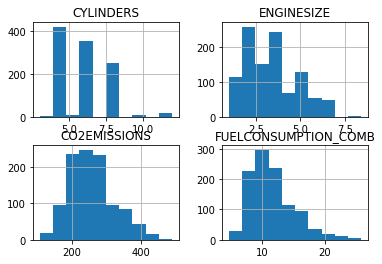

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Plot fitur-fitur vs emisi dapat dibuat dan dapat dilihat linearitas hubungannya.

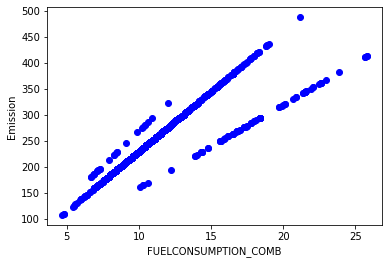

In [14]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

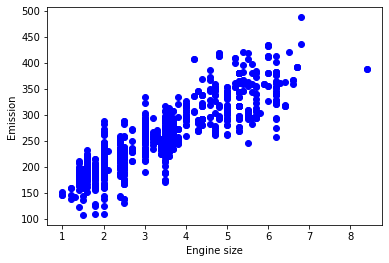

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

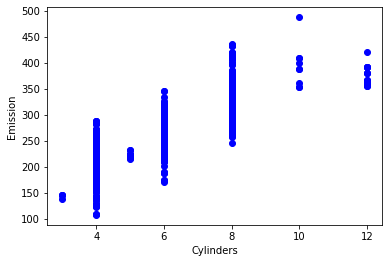

In [13]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

#### Pembuatan dataset pelatihan dan pengujian
Pemisahan data latih/uji melibatkan pemisahan dataset menjadi dataset pelatihan dan pengujian, yang saling eksklusif. Setelah itu, dataset pelatihan dapat digunakan untuk membuat model dan dataset pengujian untuk pengujian.
Hal ini akan memberikan evaluasi yang lebih akurat pada akurasi out-of-sample karena dataset pengujian bukan merupakan bagian dari dataset yang telah digunakan untuk melatih data. Ini lebih realistis untuk masalah dunia nyata.

Ini berarti bahwa hasil dari setiap titik data dalam kumpulan data ini diketahui, sehingga sangat bagus untuk data pengujian. Dataset pengujian belum digunakan untuk melatih model, sehingga model tidak memiliki pengetahuan tentang hasil dari data ini, sehingga dapat disebut pengujian di luar sampel.



In [8]:
# Mengambil "Engine Size" sebagai variabel independen (regressor)
X = cdf.iloc[:, 0].values
# Mengambil "Emission" sebagai variabel dependen
y = cdf.iloc[:, 3].values
# Reshape data karena hanya menggunakan satu fitur "Engine Size"
X = X.reshape(-1,1)
# Reshape data karena hanya satu fitur
y = y.reshape(-1,1)

Proses splitting dataset pelatihan dan pengujian

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Normalisasi atau scaling dataset

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

Pembuatan Model

In [10]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X, y)

<ipython-input-10-7ee4fb22494a>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, y)


RandomForestRegressor()

Prediksi nilai baru dengan model yang telah dibentuk

In [15]:
# Predicting a new result

y_pred = regressor.predict(sc_X.transform(np.array([[5.4]])))
#To transform 5.4 to the scaled X value, we first need to convert it into the array form
#Since the transform method of StandardScaler Library only accepts arrays

y_pred = sc_y.inverse_transform(y_pred)
#Now the prediction gives us the scaled value of y
#Thus we need inverse transformation of the scaled value for the real results

print(y_pred)

ValueError: ignored

Visualisasi Hasil dalam nilai yang discaling:

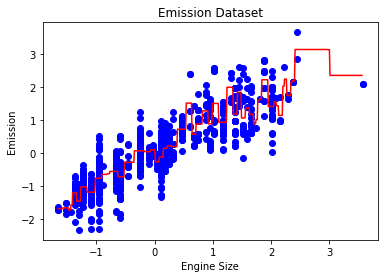

In [16]:
# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'blue')
plt.plot(X_grid, regressor.predict(X_grid), color = 'red')
plt.title('Emission Dataset')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

Visualisasi Hasil dalam nilai asalnya:

ValueError: ignored

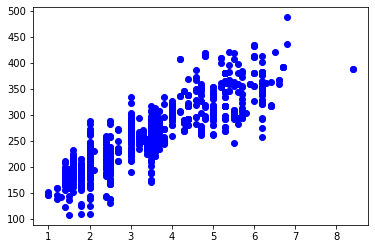

In [17]:
# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'blue')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regressor.predict(X_grid)), color = 'red')
plt.title('Emission Dataset')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

Visualisasi Tree (dengan nilai yang discaling):

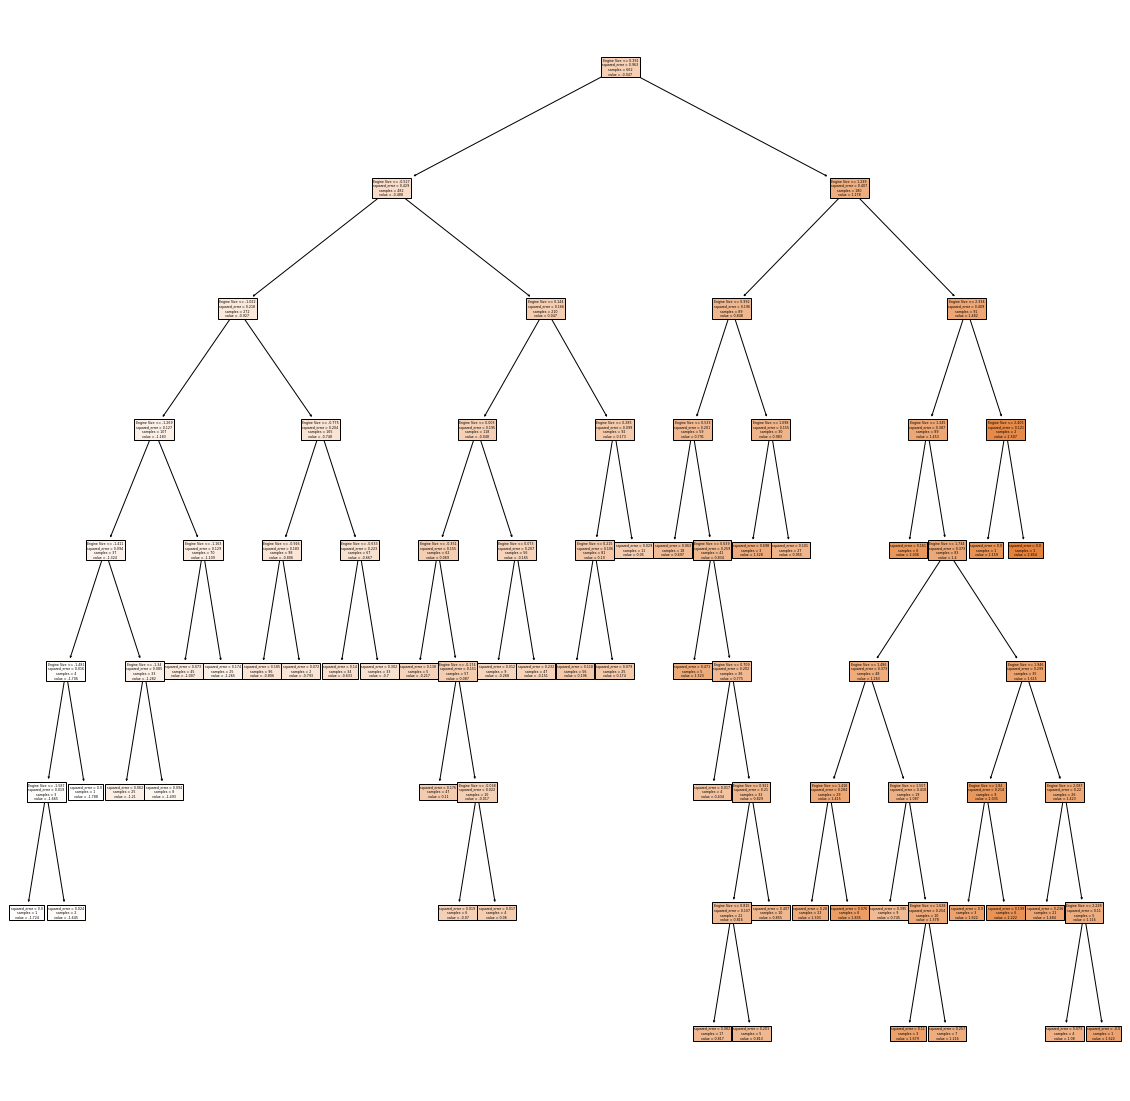

In [18]:
from sklearn import tree
plt.figure(figsize=(20,20))
graph = tree.plot_tree(regressor.estimators_[0], feature_names=['Engine Size'], filled=True)

#### Evaluasi
Nilai aktual dan nilai prediksi dapat dibandingkan untuk menghitung akurasi dari model regresi. Metrik evaluasi sangat penting untuk pengembangan model karena memberikan pengetahuan untuk perbaikan model.

Ada berbagai metrik untuk evaluasi model, misalnya MSE sebagai error untuk mengetahui akurasi dari model yang dibangun yang dihitung dari MSE model terhadap data pengujian: 
    - Mean Absolute Error (MAE): Rerata dari nilai absolut dari error. MAE adalah metrik paling mudah dipahami karena hanya rata-rata dari error.
    - Mean Squared Error (MSE): adalah rerata dari error dikuadratkan. MSE lebih populer dibanding MAE karena fokus pada error yang besar karena dikuadratkan sehingga berdampak lebih besar terhadap error yang lebih besar dibandingkan error yang lebih kecil.
    - Root Mean Squared Error (RMSE).
    - R-squared bukan error namun metrik yang populer yang merepresentasikan sejauh mana data cocok dengan garis regresi yang didapatkan. Semakin besar R-squared akan semaki baik pencocokan garis terhadap data. Nilai terbaik adalah 1.0 dan dapat bernilai negatif.


In [19]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(cdf[['ENGINESIZE']])
test_y = np.asanyarray(cdf[['CO2EMISSIONS']])
test_y_ = sc_y.inverse_transform(regressor.predict(sc_X.transform(test_x)))

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

ValueError: ignored

In [20]:
from datetime import datetime
waktu = datetime.now()
print("Last update: ", waktu)

Last update:  2023-01-08 05:11:09.934605
